In [83]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv("commute_1.csv")

In [85]:
df

,date,dow,temp,conditions,commute_type
0,11/28/2022,Monday,20,sun,walk
1,11/29/2022,Tuesday,25,sun,walk
2,11/30/2022,Wednesday,40,sun,bike
3,12/1/2022,Thursday,45,partly sunny,bike
4,12/2/2022,Friday,33,partly sunny,walk
5,12/6/2022,Tuesday,44,rain,car
6,12/7/2022,Wednesday,45,rain,car
7,12/8/2022,Thursday,50,rain,car
8,12/13/2022,Tuesday,32,cloudy,walk
9,12/14/2022,Wednesday,40,cloudy,walk


In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier(max_depth= 2)
X = df[["temp"]]
y = df["commute_type"]

In [87]:
model.fit(X,y)

DecisionTreeClassifier(max_depth=2)

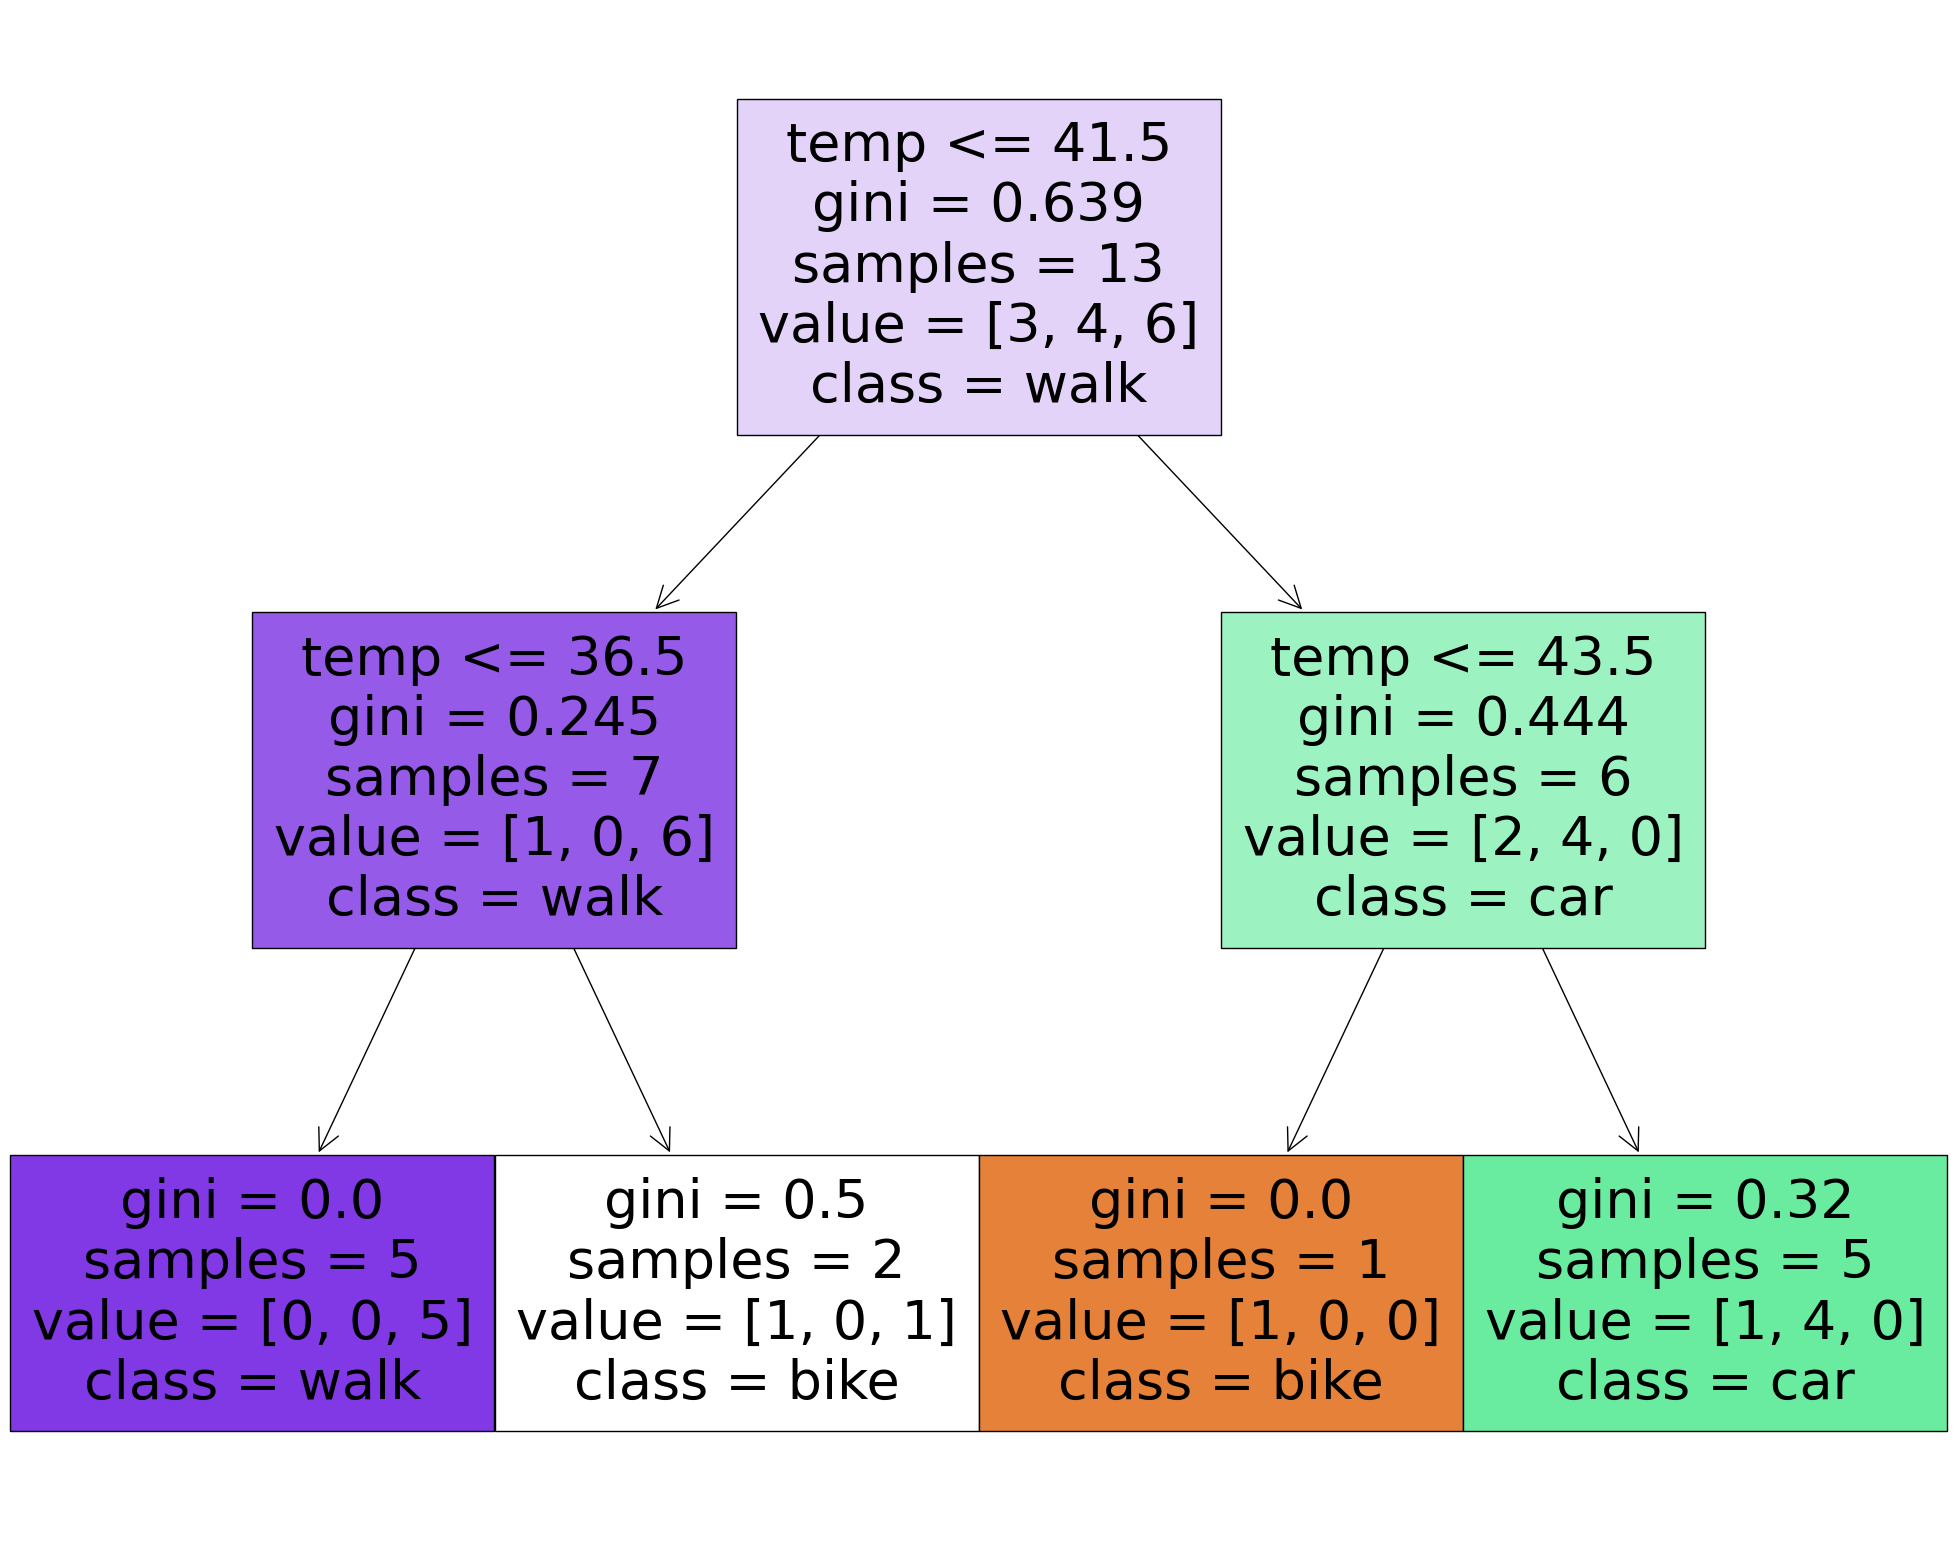

In [88]:
plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=X.columns,  
                   class_names=model.classes_,
                   filled=True)

In [89]:
model.predict([[60]])

array(['car'], dtype=object)

In [90]:
from sklearn.preprocessing import OneHotEncoder 
encoder = OneHotEncoder()
condition_encoded = encoder.fit_transform(df[['conditions']])

condition_df = pd.DataFrame(condition_encoded.toarray(),
                                    columns=encoder.categories_[0].tolist(),
                                    index=df.index)

condition_df

,cloudy,partly sunny,rain,sun
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
5,0.0,0.0,1.0,0.0
6,0.0,0.0,1.0,0.0
7,0.0,0.0,1.0,0.0
8,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0


In [91]:
model = DecisionTreeClassifier(max_depth= 3)
X = df[["temp"]]
X = X.join(condition_df)
y = df["commute_type"]
model.fit(X, y)

DecisionTreeClassifier(max_depth=3)

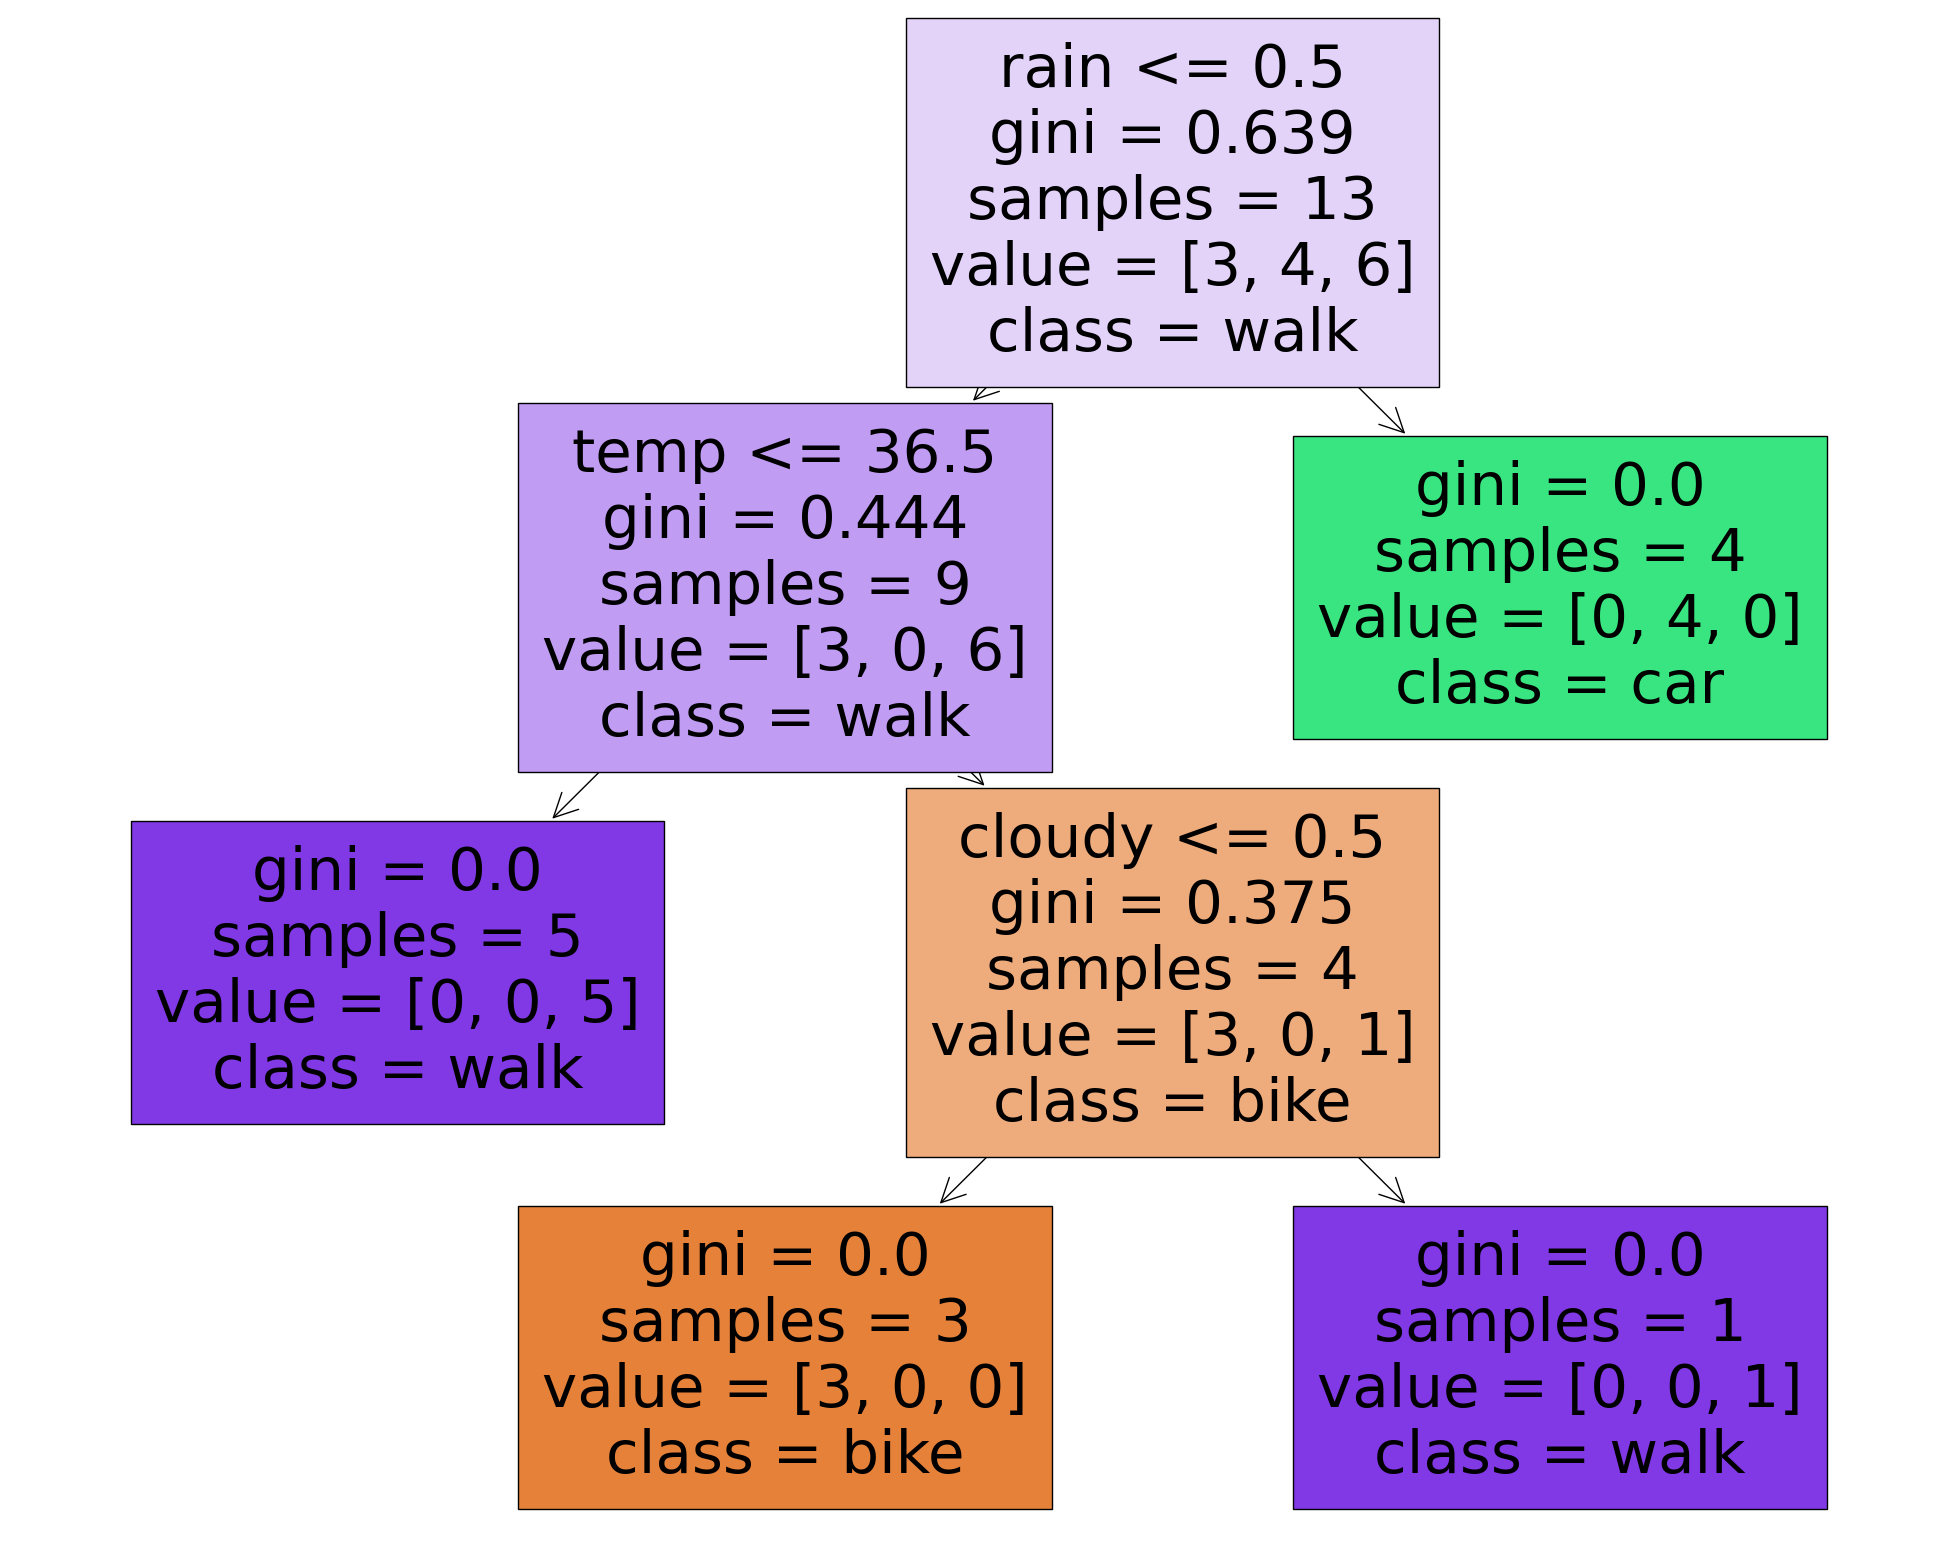

In [92]:
plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=X.columns,  
                   class_names=model.classes_,
                   filled=True)

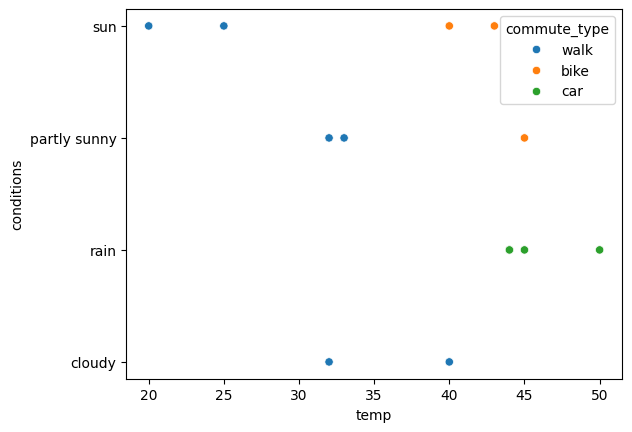

In [93]:
import seaborn as sns

sns.scatterplot(data=df, x='temp', y='conditions', hue='commute_type')
plt.show()

In [94]:
fn = "northeast_realestate.parquet"

# reading data into pandas dataframe
df = pd.read_parquet(fn)
print(df.columns)
df

Index(['price', 'bed', 'bath', 'acre_lot', 'street', 'city', 'state',
       'zip_code', 'house_size', 'sold_date'],
      dtype='object')


,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,sold_date
0,225000.0,3.0,1.0,3.93,326 River Rd,Willington,Connecticut,6279.0,1572.0,None
1,579900.0,4.0,3.0,2.34,32 Heather Ln,Coventry,Connecticut,6238.0,3320.0,6/1/2021
2,65000.0,1.0,1.0,NaN,63 Schofield Rd Apt 34,Willington,Connecticut,6279.0,680.0,8/16/2019
3,215000.0,2.0,1.0,0.91,353 Rye St,East Windsor,Connecticut,6016.0,960.0,6/6/2012
4,144900.0,2.0,1.0,0.36,24 Worcester Rd,Vernon,Connecticut,6066.0,860.0,9/2/2016
...,...,...,...,...,...,...,...,...,...,...
517500,445000.0,1.0,2.0,0.99,1008 King St,Chappaqua,New York,10514.0,1052.0,5/9/2011
517501,418000.0,4.0,2.0,0.40,3 Elmwood Dr,Monroe,New York,10950.0,1650.0,7/21/2015
517502,469000.0,4.0,2.0,0.18,13 N Conger Ave,Congers,New York,10920.0,2123.0,None
517503,825000.0,5.0,5.0,0.79,7 Miller Rd,Valley Cottage,New York,10989.0,3775.0,6/2/2010


In [95]:
towns = df.groupby(['city','state'],as_index=False).count().sort_values('price',ascending=False)
towns.head(20)

,city,state,price,bed,bath,acre_lot,street,zip_code,house_size,sold_date
937,New York City,New York,48801,42523,48199,11959,47517,48801,30773,24690
936,New York,New York,47362,40976,47061,556,47360,47360,27377,26021
138,Boston,Massachusetts,31502,29926,30927,14160,31502,31502,31062,12510
177,Brooklyn,New York,22698,20213,22079,9920,22671,22698,17117,12721
170,Bronx,New York,11586,10910,11136,5220,11574,11586,9735,7751
1320,Staten Island,New York,8032,7501,7720,7756,8011,8032,7551,5543
784,Manhattan,New York,6532,5814,6531,4,6532,6532,3564,3501
466,Flushing,New York,4673,4372,4632,2362,4623,4673,2461,3261
666,Jamaica,New York,3851,3717,3816,3252,3851,3851,1504,3032
1595,Worcester,Massachusetts,3715,3386,3386,3294,3715,3715,3386,1944


In [96]:
df['city,state']=df['city']+'_'+df['state']
df

,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,sold_date,"city,state"
0,225000.0,3.0,1.0,3.93,326 River Rd,Willington,Connecticut,6279.0,1572.0,None,Willington_Connecticut
1,579900.0,4.0,3.0,2.34,32 Heather Ln,Coventry,Connecticut,6238.0,3320.0,6/1/2021,Coventry_Connecticut
2,65000.0,1.0,1.0,NaN,63 Schofield Rd Apt 34,Willington,Connecticut,6279.0,680.0,8/16/2019,Willington_Connecticut
3,215000.0,2.0,1.0,0.91,353 Rye St,East Windsor,Connecticut,6016.0,960.0,6/6/2012,East Windsor_Connecticut
4,144900.0,2.0,1.0,0.36,24 Worcester Rd,Vernon,Connecticut,6066.0,860.0,9/2/2016,Vernon_Connecticut
...,...,...,...,...,...,...,...,...,...,...,...
517500,445000.0,1.0,2.0,0.99,1008 King St,Chappaqua,New York,10514.0,1052.0,5/9/2011,Chappaqua_New York
517501,418000.0,4.0,2.0,0.40,3 Elmwood Dr,Monroe,New York,10950.0,1650.0,7/21/2015,Monroe_New York
517502,469000.0,4.0,2.0,0.18,13 N Conger Ave,Congers,New York,10920.0,2123.0,None,Congers_New York
517503,825000.0,5.0,5.0,0.79,7 Miller Rd,Valley Cottage,New York,10989.0,3775.0,6/2/2010,Valley Cottage_New York


In [97]:
top_towns = ['Staten Island_New York','Worcester_Massachusetts','Boston_Massachusetts','Manhattan_New York','Portland_Maine']
df_top = df[df['city,state'].isin(top_towns)]
df_top = df_top[['price','bed','bath','house_size','city,state']].dropna()
df_top

,price,bed,bath,house_size,"city,state"
95335,319000.0,3.0,1.0,992.0,Portland_Maine
95387,314900.0,4.0,2.0,2272.0,Portland_Maine
95399,409000.0,3.0,2.0,1351.0,Portland_Maine
95404,424900.0,3.0,2.0,1656.0,Portland_Maine
95406,500000.0,3.0,2.0,1535.0,Portland_Maine
...,...,...,...,...,...
512398,290000.0,1.0,1.0,847.0,Staten Island_New York
512402,899000.0,2.0,2.0,1152.0,Manhattan_New York
512415,975000.0,1.0,1.0,638.0,Manhattan_New York
512416,3295000.0,5.0,6.0,3395.0,Manhattan_New York


In [98]:
levels, categories = pd.factorize(df_top['city,state'])
print(levels)

[0 0 0 ... 3 3 3]


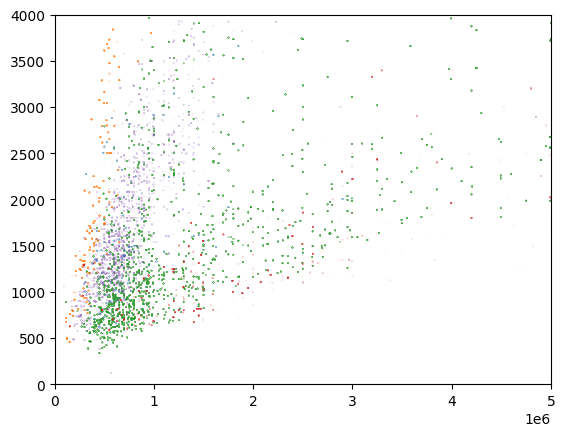

In [99]:
import matplotlib

colors = [plt.cm.tab10(i) for i in levels] # using the "tab10" colormap
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]
plt.scatter(df_top['price'],df_top['house_size'],c=colors,s=.001)
plt.xlim(0,.5e7)
plt.ylim(0,4000)
plt.show()

In [100]:
from sklearn.model_selection import train_test_split

model = DecisionTreeClassifier(max_depth=3)
_,classes = pd.factorize(df_top['city,state'])
print(classes)
features = ['price','bed','bath','house_size']
X = df_top[features]
y = df_top['city,state']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            train_size=0.7,
                                            random_state=66) 

model.fit(X_train,y_train)


Index(['Portland_Maine', 'Worcester_Massachusetts', 'Boston_Massachusetts',
       'Manhattan_New York', 'Staten Island_New York'],
      dtype='object')


DecisionTreeClassifier(max_depth=3)

In [101]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_0 <= 528500.00
|   |--- feature_3 <= 1202.50
|   |   |--- feature_0 <= 324999.50
|   |   |   |--- class: Worcester_Massachusetts
|   |   |--- feature_0 >  324999.50
|   |   |   |--- class: Boston_Massachusetts
|   |--- feature_3 >  1202.50
|   |   |--- feature_1 <= 2.50
|   |   |   |--- class: Staten Island_New York
|   |   |--- feature_1 >  2.50
|   |   |   |--- class: Worcester_Massachusetts
|--- feature_0 >  528500.00
|   |--- feature_1 <= 2.50
|   |   |--- feature_0 <= 1180000.00
|   |   |   |--- class: Boston_Massachusetts
|   |   |--- feature_0 >  1180000.00
|   |   |   |--- class: Boston_Massachusetts
|   |--- feature_1 >  2.50
|   |   |--- feature_0 <= 1289500.00
|   |   |   |--- class: Boston_Massachusetts
|   |   |--- feature_0 >  1289500.00
|   |   |   |--- class: Boston_Massachusetts



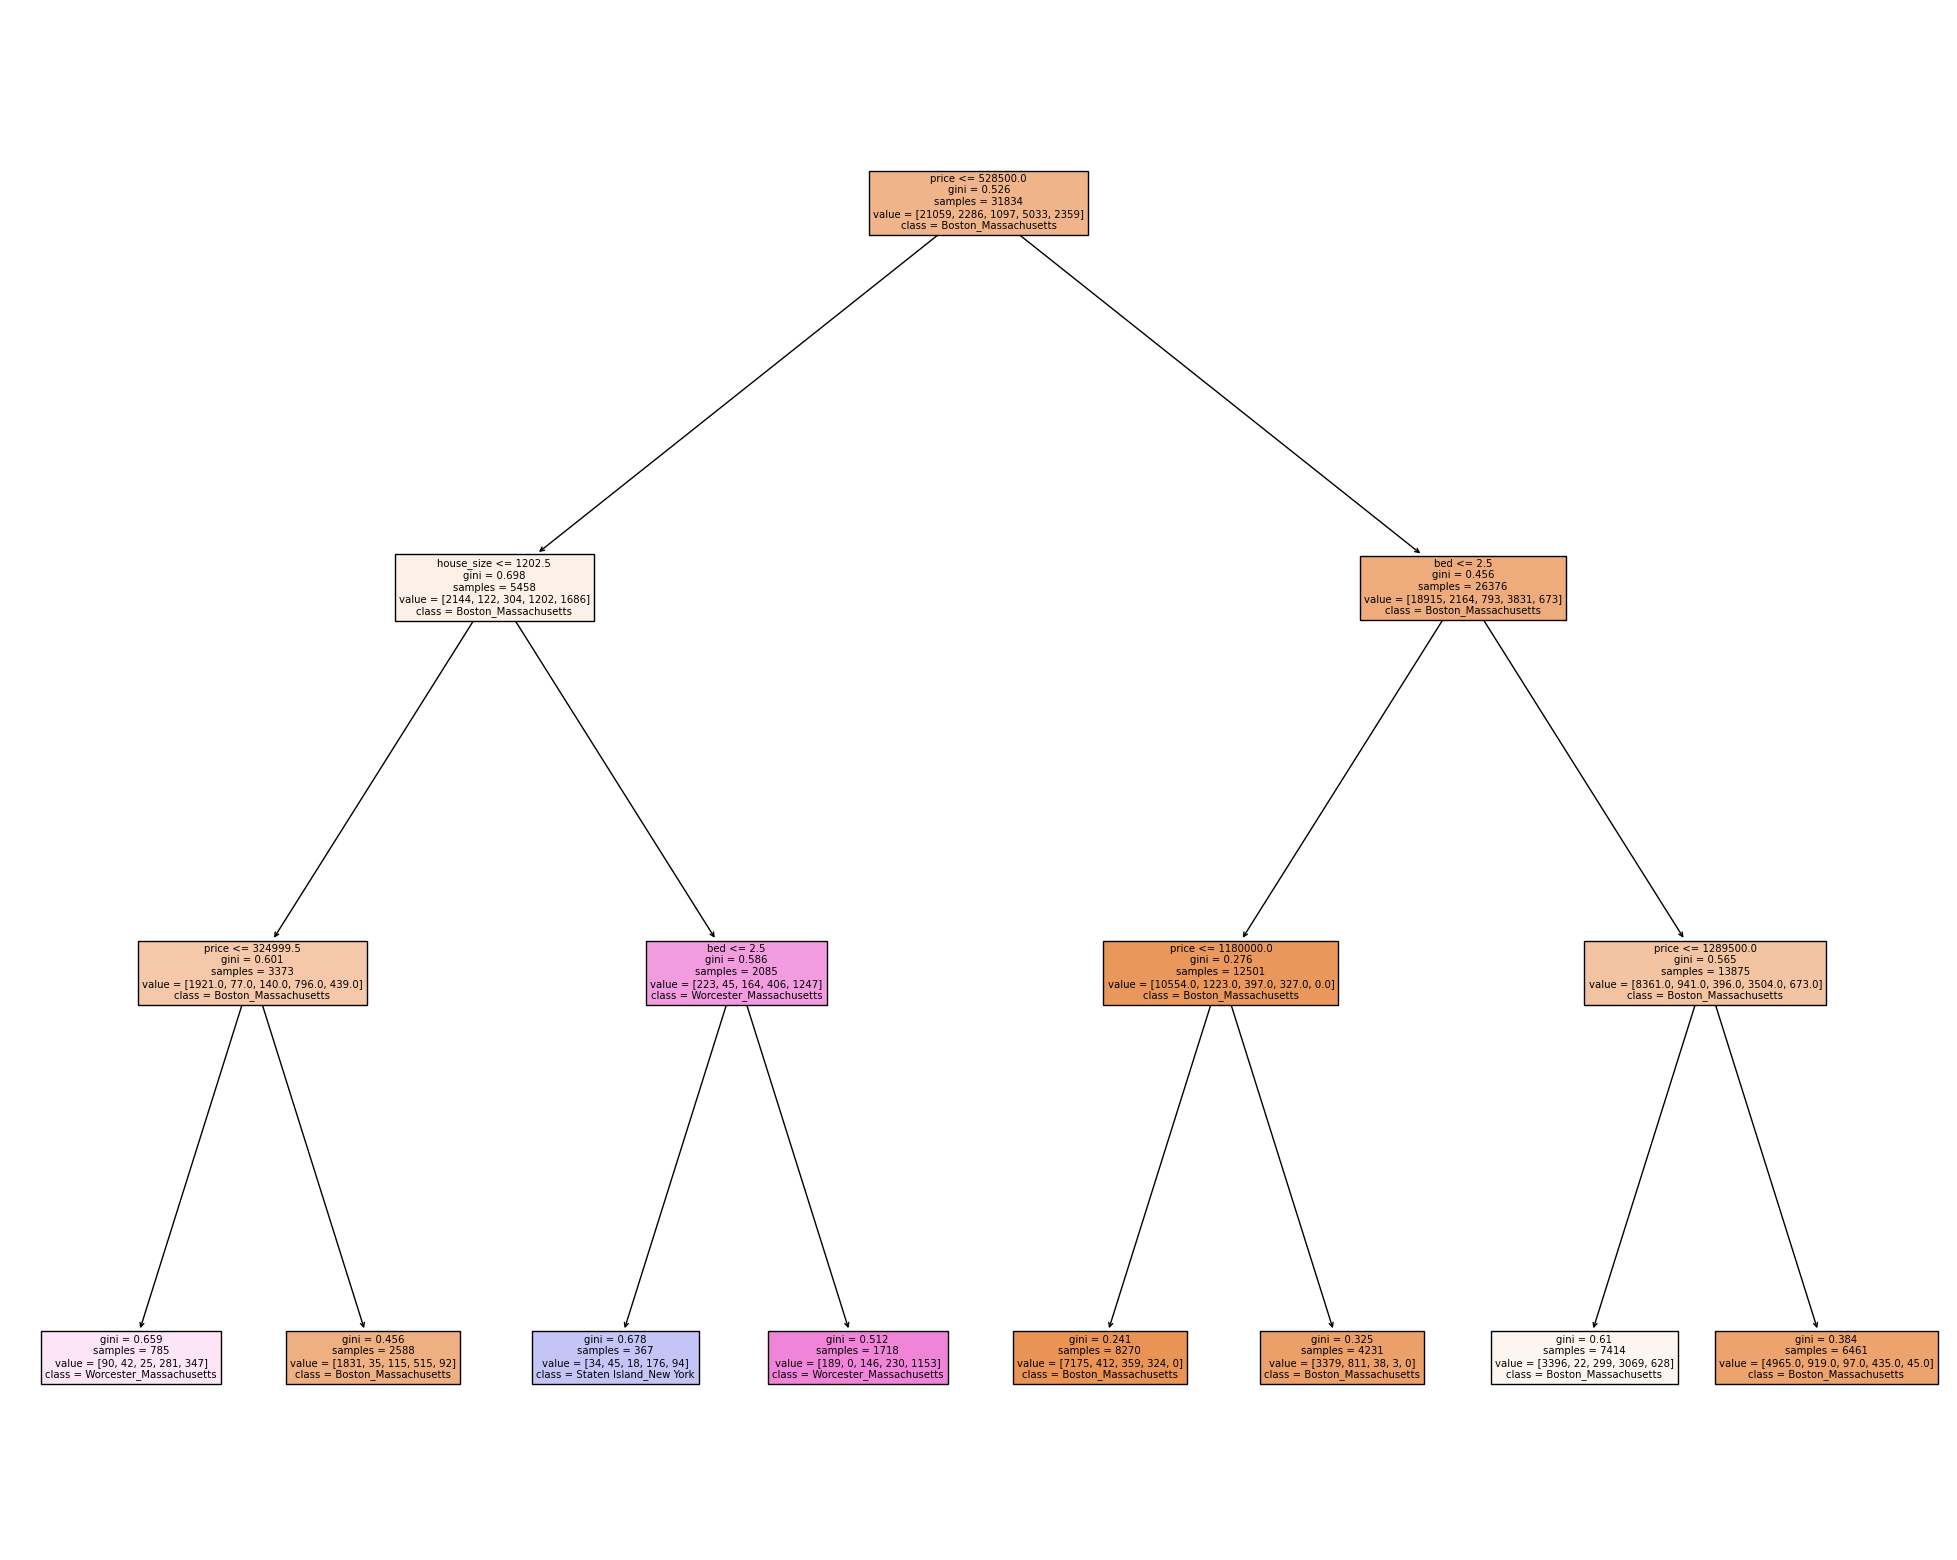

In [102]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=['price','bed','bath','house_size'],  
                   class_names=model.classes_,
                   filled=True)

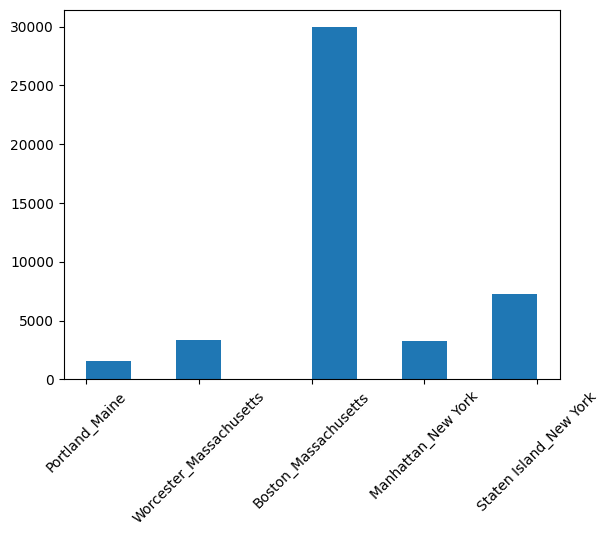

In [103]:
plt.hist(df_top['city,state'])
plt.xticks(rotation=45)
plt.show()

In [104]:
from sklearn import metrics
depth = 1
while depth <50:
    lg_model = DecisionTreeClassifier(random_state=7,max_depth=depth)
    lg_model.fit(X_train,y_train)
    y_pred = lg_model.predict(X_train)
    y_pred_test = lg_model.predict(X_test)
    txt = ' '
    if metrics.accuracy_score(y_train, y_pred)<metrics.accuracy_score(y_test, y_pred_test):
        txt = '!' 
    print(depth,metrics.accuracy_score(y_train, y_pred),metrics.accuracy_score(y_test, y_pred_test),lg_model.tree_.node_count,txt)
    depth+=1

1 0.6615254130803543 0.6498827323365582 3  
2 0.6936922786957341 0.6816182937554969 7  
3 0.7043412703398881 0.6923189680445617 15  
4 0.7176917760884589 0.7086631486367634 31  
5 0.7505811396619966 0.7442832014072119 63  
6 0.774926179556449 0.7677367340955732 117  
7 0.8017842558271031 0.7962474347698623 209  
8 0.8302758057422881 0.8233655819407798 351  
9 0.8584218131557454 0.8549545587804163 539  
10 0.8911541119557705 0.8841981823512166 747  
11 0.9138342652509895 0.9051597771914395 967  
12 0.9368285480932337 0.9294928173556142 1175  
13 0.9542313249984293 0.9502345353268836 1357  
14 0.9701576930326067 0.9654060392846673 1501  
15 0.9767858264748382 0.9739079448841982 1609  
16 0.9853301501539234 0.9807974201114043 1691  
17 0.9907960042721619 0.988053356786866 1751  
18 0.9966702268015329 0.9926707710348871 1801  
19 0.998366526355469 0.9946496628554676 1827  
20 0.9992775020418421 0.9956024626209323 1843  
21 0.9995288056794622 0.9958223394898856 1847  
22 0.9996858704529749 

X variables: price bed
Y: citystate
Train Accuracy: 0.957764183357077
Train F1 Score: 0.9420004397712509
Test Accuracy: 0.9544235924932976
Test F1 Score: 0.9395123181226563
X variables: price bath
Y: citystate
Train Accuracy: 0.9348026481186625
Train F1 Score: 0.9204275535560721
Test Accuracy: 0.9309651474530831
Test F1 Score: 0.9180014398037055
X variables: price house_size
Y: citystate
Train Accuracy: 0.9989943853180256
Train F1 Score: 0.9981883103904468
Test Accuracy: 0.9943029490616622
Test F1 Score: 0.9934813135230366
X variables: bed bath
Y: citystate
Train Accuracy: 0.5787312494762423
Train F1 Score: 0.4256308963423003
Test Accuracy: 0.5703753351206434
Test F1 Score: 0.4236363709522454
X variables: bed house_size
Y: citystate
Train Accuracy: 0.9454454035028912
Train F1 Score: 0.9463340763118776
Test Accuracy: 0.9323056300268097
Test F1 Score: 0.932100375635114
X variables: bath house_size
Y: citystate
Train Accuracy: 0.9327914187547138
Train F1 Score: 0.9297197851490437
Test Acc

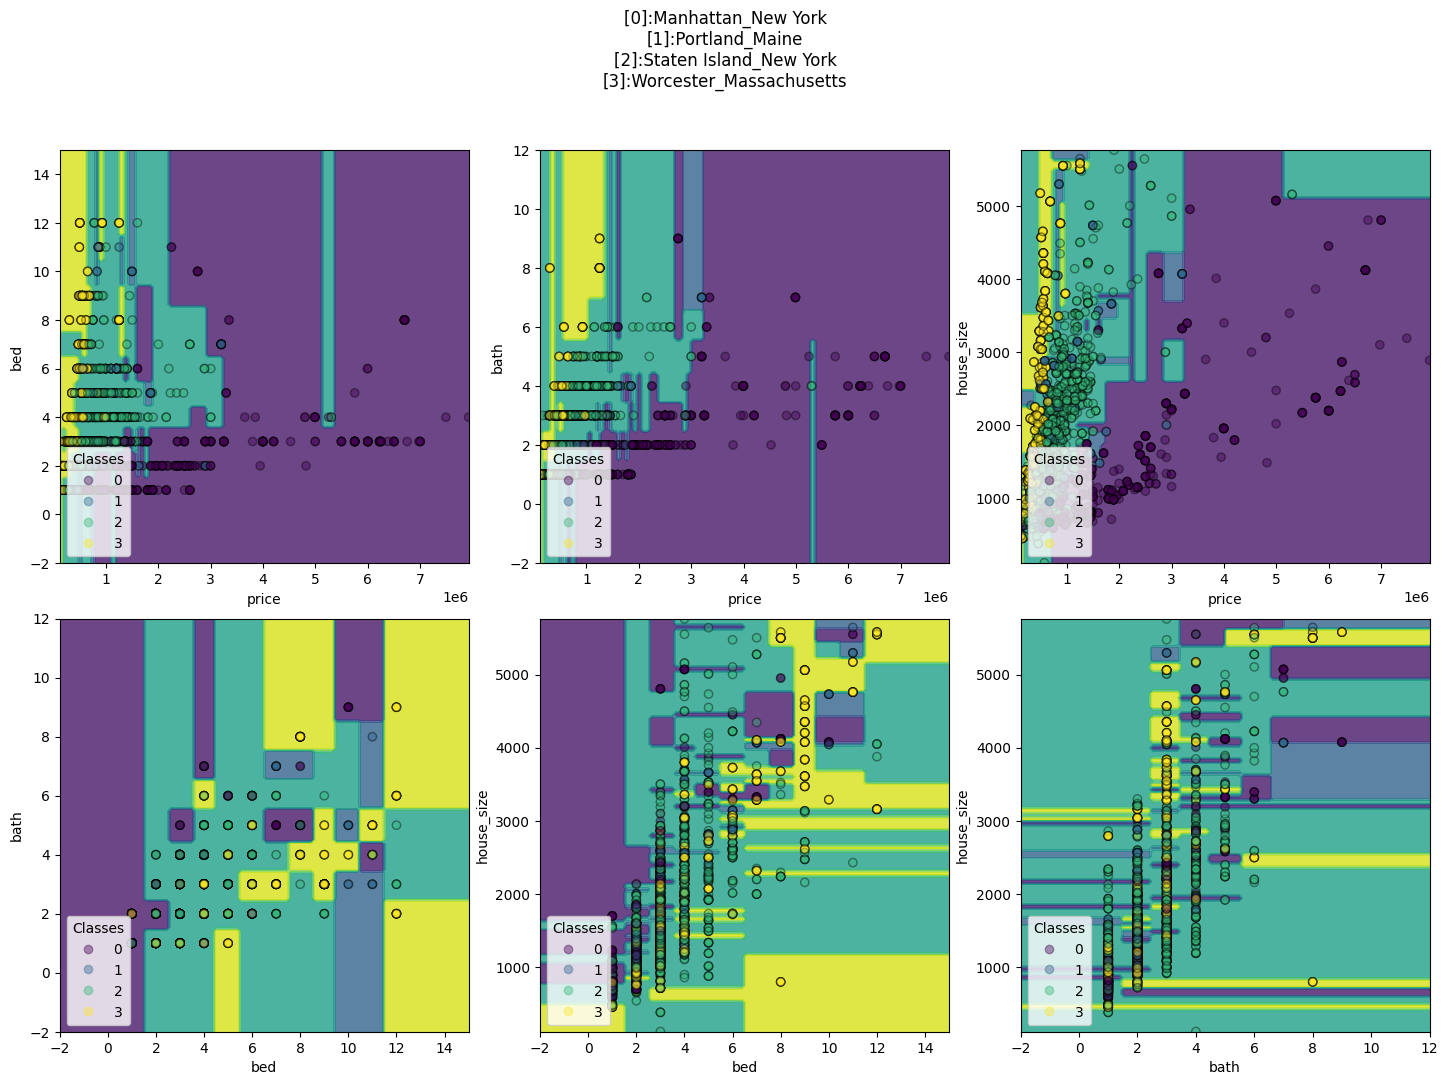

In [105]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import DecisionBoundaryDisplay

fn = "northeast_realestate.parquet"

# reading data into pandas dataframe
df = pd.read_parquet(fn)
df['citystate'] = df['city'] + '_' + df['state']
top_towns = ['Staten Island_New York','Worcester_Massachusetts','Manhattan_New York','Portland_Maine']

df_top = df[df['citystate'].isin(top_towns)]
df_top = df_top[(df_top['price'] < 8000000)]
df_top = df_top[(df_top['bed'] < 15)]
df_top = df_top[(df_top['bath'] < 15)]
df_top = df_top[(df_top['house_size'] < 6000)]

df_top = df_top[['price','bed','bath','house_size','citystate']].dropna()
top_towns = ['Staten Island_New York','Worcester_Massachusetts','Manhattan_New York','Portland_Maine']

features = ['price','bed','bath','house_size']
X = df_top[features]

y = df_top[['citystate']]  #column 2

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            train_size=0.8,
                                            random_state=66) 

combined_test = pd.concat([X_test, y_test], axis=1)
le = LabelEncoder()
y_factorized_train = le.fit_transform(y_train)
y_factorized_test = le.transform(y_test)
combined_test['y_test_factor'] = y_factorized_test

# Parameters
plt.figure(figsize=(15,10))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    model = DecisionTreeClassifier()
    X_train_sub = X_train.iloc[:,pair].copy()
    X_test_sub = X_test.iloc[:,pair].copy()
    model.fit(X_train_sub, y_factorized_train)

    y_pred_train = model.predict(X_train_sub)
    y_pred = model.predict(X_test_sub)
    print(f'X variables: {features[pair[0]]} {features[pair[1]]}\nY: citystate')
    print(f'Train Accuracy: {metrics.accuracy_score(y_factorized_train, y_pred_train)}')
    print(f'Train F1 Score: {metrics.f1_score(y_factorized_train, y_pred_train, average='macro')}')
    print(f'Test Accuracy: {metrics.accuracy_score(y_factorized_test, y_pred)}')
    print(f'Test F1 Score: {metrics.f1_score(y_factorized_test, y_pred, average='macro')}')


    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    
    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        X_test_sub,
        plot_method='contourf',
        xlabel=features[pair[0]],
        ylabel=features[pair[1]],
        alpha=0.8,
        eps=3,
        ax=ax
    )

    scatter = disp.ax_.scatter(combined_test[features[pair[0]]],
                 combined_test[features[pair[1]]],
                 c=combined_test['y_test_factor'],
                 edgecolor="k",
                 alpha=0.4)

    plt.legend(*scatter.legend_elements(),
                        loc="lower left", title="Classes")

plt.suptitle(''.join([f'{le.transform([s])}:{s}\n' for s in le.classes_]), y=1.1)
_ = plt.axis("tight")
plt.show()

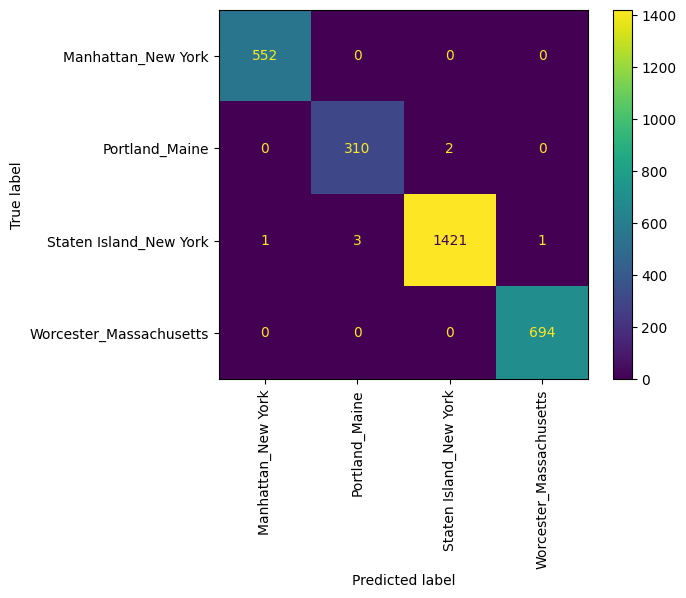

In [106]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

metrics.ConfusionMatrixDisplay.from_predictions(y_test,
                                                y_pred,
                                                xticks_rotation='vertical')
plt.show()

In [107]:
print(metrics.classification_report(y_test,y_pred))

                         precision    recall  f1-score   support

     Manhattan_New York       1.00      1.00      1.00       552
         Portland_Maine       0.99      0.99      0.99       312
 Staten Island_New York       1.00      1.00      1.00      1426
Worcester_Massachusetts       1.00      1.00      1.00       694

               accuracy                           1.00      2984
              macro avg       1.00      1.00      1.00      2984
           weighted avg       1.00      1.00      1.00      2984

